## Load graph and communities

In [1]:
import osmnx as ox

ox.config(log_console = True, data_folder = 'data')
graph = ox.load_graphml('nerails_with_pop.graphml')

In [2]:
def plot_communities(G, C, figsize=10):
    def com_idx_of(node):
        for i, c in enumerate(C):
            if node in c:
                return i
        raise 'err'
    def colormap(node):
        return (com_idx_of(node)+1) / len(C)
        
    ox.plot_graph(
        G,
        node_color=list(map(colormap, G.nodes)),
        fig_height=figsize,
        fig_width=figsize,
        node_zorder=3,
        edge_alpha=0.2
    )

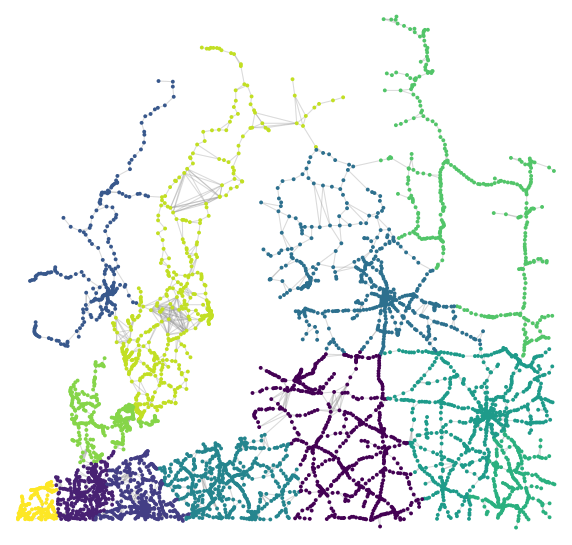

In [3]:
import pickle

data_path_template = 'data/commumities_{}.pickle'

splits = []
for i in range(20):
    with open(data_path_template.format(i), 'rb') as data:
        splits.append(pickle.load(data))

plot_communities(graph, splits[10])

## Download and map country data

In [9]:
from os import path
from urllib import request
from zipfile import ZipFile

source = 'http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip'
zip_dst = path.join('data', 'compressed', 'worldborders.zip')

desired_extensions = ['.dbf', '.prj', '.shp', '.shx']
zipped_files = ['TM_WORLD_BORDERS-0.3{}'.format(e) for e in desired_extensions]
dsts = [path.join('data', 'wordborders.{}'.format(e)) for e in desired_extensions]

if not path.exists(zip_dst):
    res = request.urlopen(source)
    with open(zip_dst, 'wb') as zf:
        zf.write(res.read())

for zipped_file, dst in zip(zipped_files, dsts):
    with ZipFile(zip_dst).open(zipped_file, 'r') as zf:
        with open(dst, 'wb') as dest:
            dest.write(zf.read())

In [15]:
from countries import countries

cc = countries.CountryChecker(dst)

mystery_country = cc.getCountry(countries.Point(60.17, 24.94))
print(mystery_country, mystery_country.iso)

Finland FI


In [26]:
for i, nd in enumerate(graph.nodes.values()):
    if i % 500 == 0:
        print(i, '...', end=' ')
    pos = countries.Point(nd['y'], nd['x'])
    country = cc.getCountry(pos)
    nd['country'] = 'UNKNOWN' if country is None else country.iso

print('Done!')

0 ... 500 ... 1000 ... 1500 ... 2000 ... 2500 ... 3000 ... 3500 ... 4000 ... 4500 ... 5000 ... Done!


## Create dataframes and pivots

In [33]:
import pandas as pd

node_df = pd.DataFrame.from_dict(graph.nodes, orient='index')
node_df

,y,x,osmid,railway,name,population,country
306068527,53.876959,30.404060,306068527,station,Луполово,240.58267,BY
3197892918,53.554208,10.066125,3197892918,station,Rauhes Haus,317.4676,DE
252086216,53.837230,11.998196,252086216,station,Bützow,144.45564,DE
5720557910,60.123637,11.464874,5720557910,station,Årnes,128.97055,NO
273771068,53.933940,10.307888,273771068,station,Bad Segeberg,193.56854,DE
...,...,...,...,...,...,...,...
2659070273,55.504397,28.565815,2659070273,station,Новополоцк,192.29211,BY
1037851022,55.345984,12.325699,1037851022,station,Klippinge,75.90661,DK
1032106117,57.804307,28.411424,1032106117,station,Берёзки,175.54535,RU
1264749334,59.464694,33.819030,1264749334,station,Бор,120.966606,RU


In [34]:
node_df[node_df['country'] == 'UNKNOWN']

,y,x,osmid,railway,name,population,country
5157629618,53.458573,6.830832,5157629618,station,Eemshaven,36.20038,UNKNOWN
897590743,56.524373,21.016470,897590743,station,Liepāja,184.57957,UNKNOWN
1655765253,57.591699,9.963422,1655765253,station,Hirtshals,105.42863,UNKNOWN
4225502371,59.319458,18.072176,4225502371,station,Slussen,1378.9705,UNKNOWN
4993328831,55.357200,11.134946,4993328831,station,Korsør,73.606224,UNKNOWN
25948183,59.329977,18.057662,25948183,station,Stockholm central,201.78448,UNKNOWN
5974664511,55.661353,12.558811,5974664511,station,Havneholmen,300.4664,UNKNOWN
148567640,56.182488,15.600914,148567640,station,Bergåsa,196.77116,UNKNOWN
5987468130,57.441370,10.540254,5987468130,station,Frederikshavn,138.61061,UNKNOWN
3681386214,55.059719,10.612339,3681386214,station,Svendborg,194.74922,UNKNOWN


In [61]:
community_dfs = []

for communities in splits:
    community_dict = {}
    for i, c in enumerate(communities):
        for n in c: community_dict[n] = i
    community_df = pd.DataFrame.from_dict(community_dict, orient='index', columns=['community'])
    community_dfs.append(community_df)

community_dfs[10]

,community
3161759749,0
480843792,0
476416018,0
306067476,0
4481669142,0
...,...
3594213353,11
48397300,11
46475255,11
2132785146,11


In [64]:
combo_dfs = [node_df.merge(community_df, left_index = True, right_index = True) for community_df in community_dfs]
combo_dfs[10]

,y,x,osmid,railway,name,population,country,community
306068527,53.876959,30.404060,306068527,station,Луполово,240.58267,BY,0
3197892918,53.554208,10.066125,3197892918,station,Rauhes Haus,317.4676,DE,1
252086216,53.837230,11.998196,252086216,station,Bützow,144.45564,DE,2
5720557910,60.123637,11.464874,5720557910,station,Årnes,128.97055,NO,3
273771068,53.933940,10.307888,273771068,station,Bad Segeberg,193.56854,DE,1
...,...,...,...,...,...,...,...,...
2659070273,55.504397,28.565815,2659070273,station,Новополоцк,192.29211,BY,0
1037851022,55.345984,12.325699,1037851022,station,Klippinge,75.90661,DK,9
1032106117,57.804307,28.411424,1032106117,station,Берёзки,175.54535,RU,0
1264749334,59.464694,33.819030,1264749334,station,Бор,120.966606,RU,4


In [66]:
import numpy as np

pivots = [
    combo_df.pivot_table(index=['community'], columns=['country'], aggfunc='size', fill_value=0)
    for combo_df in combo_dfs
]
pivots[10]

country,BY,DE,DK,EE,FI,LT,LV,NL,NO,PL,RU,SE,UA,UNKNOWN
community,,,,,,,,,,,,,,
0,330,0,0,4,0,71,121,0,0,0,71,0,0,1
1,0,408,0,0,0,0,0,0,0,0,0,0,0,1
2,0,348,0,0,0,0,0,0,0,58,0,0,0,1
3,0,0,0,0,0,0,0,0,220,0,0,9,0,7
4,0,0,0,49,156,0,0,0,0,0,332,0,0,2
5,16,0,0,0,0,10,0,0,0,464,33,0,0,3
6,0,0,0,0,0,0,0,0,0,0,703,0,1,0
7,0,0,0,0,0,0,0,0,0,0,246,0,0,0
8,0,0,0,0,0,0,0,0,0,0,343,0,0,1


## Plot data

Text(0, 0.5, 'Total number of nodes in non-majority countries')

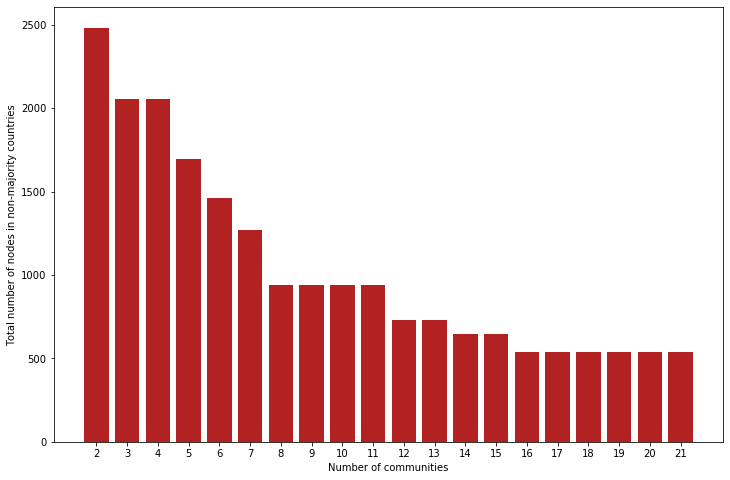

In [89]:
import matplotlib.pyplot as plt

errors = [sum(sum(p) - max(p) for i, p in pivot.iterrows()) for pivot in pivots]
num_communities = [len(c) for c in splits]

plt.figure(figsize=(12, 8))
plt.bar(num_communities, errors, color='firebrick')
plt.xticks(num_communities)
plt.xlabel('Number of communities')
plt.ylabel('Total number of nodes in non-majority countries')

The pivot with 16 communities is at index 14,
and as seen on above graph 16 communities is the least amount that gave us the best score.
Let's plot it!

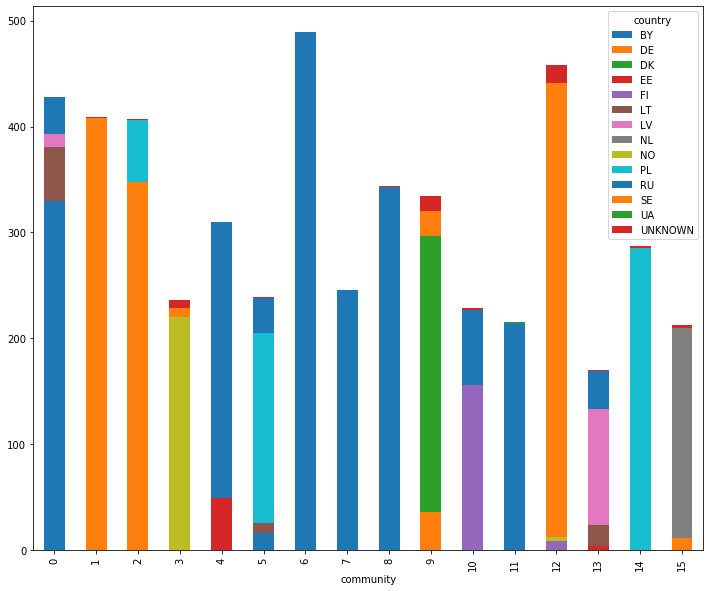

In [88]:
pivots[14].plot.bar(stacked=True, figsize=(12, 10))